In [29]:
import pandas as pd

In [30]:
df=pd.read_csv('../data/vgsales.csv')

In [31]:
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [33]:
print(df.shape)

(16598, 11)


In [34]:
print(df.describe())

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  


In [35]:
print(df.columns)

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [36]:
# Use the correct column name 'Global_Sales'
high_sales = df[df['Global_Sales'] > 10]

# Use the correct column names 'Name', 'Global_Sales', and 'Platform'
print(high_sales[['Name', 'Global_Sales', 'Platform']])

                                 Name  Global_Sales Platform
0                          Wii Sports         82.74      Wii
1                   Super Mario Bros.         40.24      NES
2                      Mario Kart Wii         35.82      Wii
3                   Wii Sports Resort         33.00      Wii
4            Pokemon Red/Pokemon Blue         31.37       GB
..                                ...           ...      ...
57              Super Mario All-Stars         10.55     SNES
58  Pokemon FireRed/Pokemon LeafGreen         10.49      GBA
59                     Super Mario 64         10.42       DS
60                       Just Dance 3         10.26      Wii
61               Call of Duty: Ghosts         10.21     X360

[62 rows x 3 columns]


In [37]:
# --- Example 1: Find the 5 best-selling games ---
print("--- Top 5 Games by Global Sales ---")

--- Top 5 Games by Global Sales ---


In [38]:
top_5_games=df.nlargest(5,'Global_Sales')
print(top_5_games[['Name','Platform','Global_Sales']])
print("\n--- Total Sales per Console ---")

                       Name Platform  Global_Sales
0                Wii Sports      Wii         82.74
1         Super Mario Bros.      NES         40.24
2            Mario Kart Wii      Wii         35.82
3         Wii Sports Resort      Wii         33.00
4  Pokemon Red/Pokemon Blue       GB         31.37

--- Total Sales per Console ---


In [39]:
# This is a classic Pandas operation:
# 1. df.groupby('Platform'): Groups all the rows by their console.
# 2. ['Global_Sales']: Specifies we only care about the sales column.
# 3. .sum(): Calculates the sum for each group.
sales_per_console = df.groupby('Platform')['Global_Sales'].sum()
# Let's sort the results to see the best-selling consoles at the top
top_consoles = sales_per_console.sort_values(ascending=False)
print(top_consoles.head(10)) # Print the top 10 consoles

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
Name: Global_Sales, dtype: float64


In [40]:
# This is a "magic command" in Jupyter that tells it to display plots inline
%matplotlib inline
import matplotlib.pyplot as plt

In [41]:
# We already calculated 'top_consoles' in the previous cell.
# Let's take just the top 10 to keep the chart clean.
top_10_consoles = top_consoles.head(11)

<Axes: title={'center': 'Top 11 Video Game Consoles by Global Sales'}, xlabel='Console', ylabel='Sales (in Millions)'>

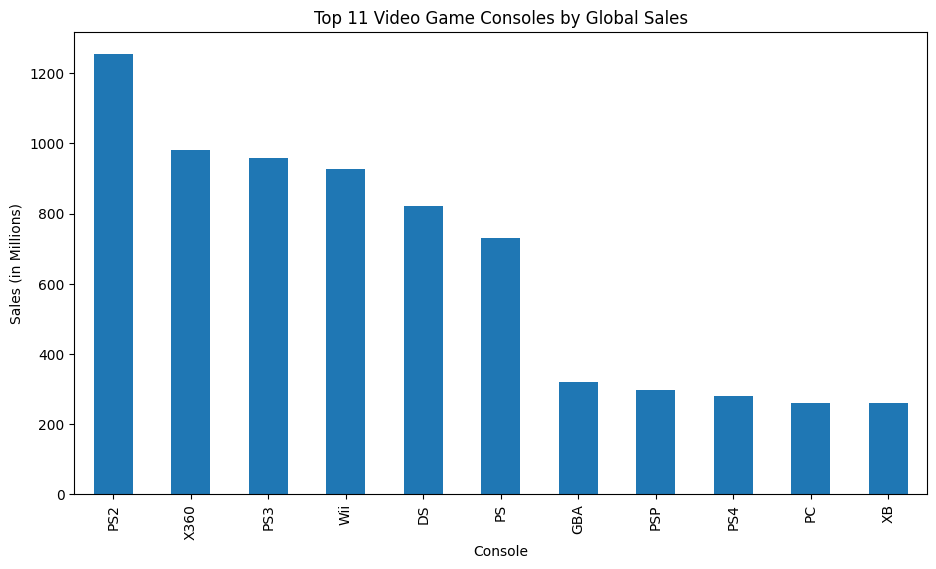

In [42]:
# Create the plot
top_10_consoles.plot(
    kind='bar', 
    figsize=(11, 6),
    title='Top 11 Video Game Consoles by Global Sales',
    xlabel='Console',
    ylabel='Sales (in Millions)'
)

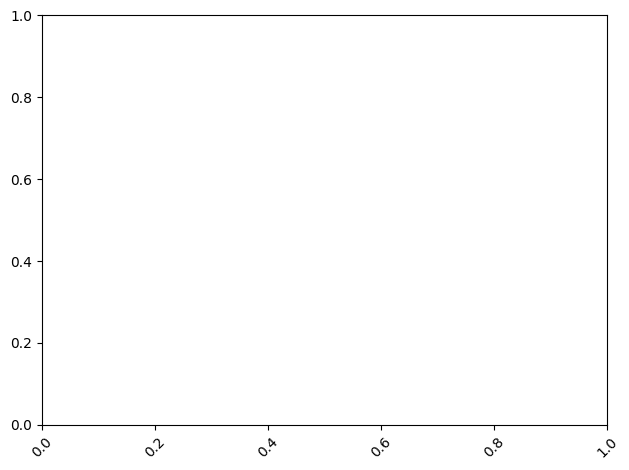

In [45]:


# Improve the layout and show the plot
plt.xticks(rotation=45) # Rotate the x-axis labels to prevent overlap
plt.tight_layout()
plt.show()